# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.19 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from unityagents import UnityEnvironment
from dqn_agent import Agent
import torch
import numpy as np
import random
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [6]:
env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

### 5. Solution

Below is the attempted solution for the Navigation problem. The details of the algorithm and hyperparameters used are provided in the Report.pdf. 

The solution is based on __Deep Q-Learning with Experience Replay Algorithm__ as explained in Human-level control through deep reinforcement learning (Mnih et al.(2015))

In [7]:
agent = Agent(state_size=37, action_size=4, seed=42)

In [8]:
def dqn(n_episodes = 1500, max_timesteps = 1000, epsilon_start = 1.0, epsilon_end = 0.01, epsilon_decay = 0.995):
    """
    Params
    ======
    n_episodes (int): maximum number of training episodes
    max_ttimesteps (int): maximum number of time steps per episode
    epsilon_start (float): starting value of epsilon
    epsilon_end (float) : minimum value of epsilon
    epsilon_decay (float) : decay factor (per episode) for decreasing epsilon
    """
    already_solved = False                                          # flag to check whether env is solved for the first time
    scores = []                                                     # list variable to hold scores from each episode
    scores_window = deque(maxlen = 100)                             # double ended queue variable to hold last hundred scores
    epsilon = epsilon_start                                         # Initialize epsilon
    for i_episode in range(1, n_episodes+1):                        # loop for n_episodes
        env_info = env.reset(train_mode=True)[brain_name]           # reset the environment        
        state = env_info.vector_observations[0]                     # get the current state
        score = 0                                                   # initialize the score
        for t in range(max_timesteps):                              # loop for max_timesteps
            action = agent.act(state, epsilon)                      # select an action based on epsilon-greedy policy
            env_info = env.step(action)[brain_name]                 # send the action to the environment
            next_state = env_info.vector_observations[0]            # get the next state
            reward = env_info.rewards[0]                            # get the reward
            done = env_info.local_done[0]                           # see if episode has finished 
            agent.step(state, action, reward, next_state, done)     # step the agent
            score += reward                                         # update the score
            state = next_state                                      # roll over the state to next time step
            if done:                                                # exit loop if episode finished
                break      
        
        scores_window.append(score)                                 # save most recent score
        scores.append(score)
        
        epsilon = max(epsilon_end, epsilon_decay * epsilon)         # Update epsilon
        
        print("\rEpisode {}\tAverage Score: {:.2f}".format(i_episode, np.mean(scores_window)), end ="")
        if i_episode % 100 == 0:
            print("\rEpisode {}\tAverage Score: {:.2f}".format(i_episode, np.mean(scores_window)))
        
        # Check if environment is solved (scoring above 13) for the first time        
        if np.mean(scores_window) >= 13.0 and not already_solved:
            solution_episode = i_episode
            solution_score = np.mean(scores_window)
            already_solved = True
            
        if i_episode == n_episodes:                                   # Save the model after last episode
            torch.save(agent.qnetwork_local.state_dict(), 'model.pt')
            
    return scores, solution_episode, solution_score
            

In [9]:
scores, solution_episode, solution_score = dqn()

print("\nEnvironment solved in {:d} episodes!\t Average score (when env was first solved): {:.2f}"
      .format(solution_episode, solution_score))

Episode 100	Average Score: 0.86
Episode 200	Average Score: 4.58
Episode 300	Average Score: 7.29
Episode 400	Average Score: 10.07
Episode 500	Average Score: 12.81
Episode 600	Average Score: 13.90
Episode 700	Average Score: 14.74
Episode 800	Average Score: 15.70
Episode 900	Average Score: 15.77
Episode 1000	Average Score: 16.06
Episode 1100	Average Score: 16.01
Episode 1200	Average Score: 16.90
Episode 1300	Average Score: 14.51
Episode 1400	Average Score: 15.02
Episode 1500	Average Score: 16.07

Environment solved in 510 episodes!	 Average score (when env was first solved): 13.03


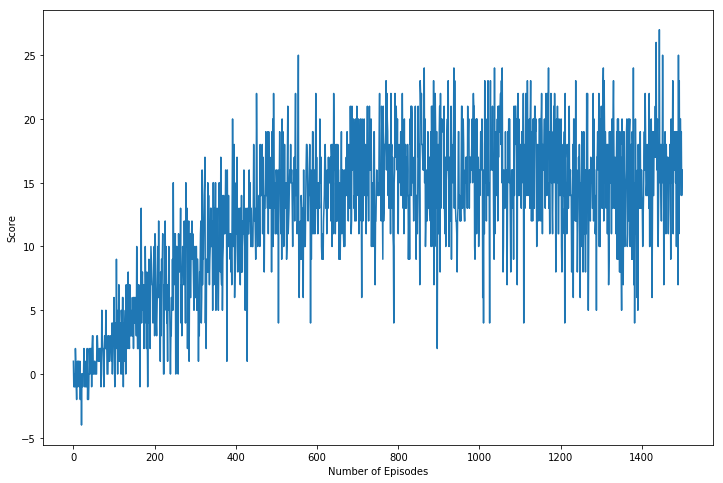

In [10]:
# plot the scores
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.xlabel('Number of Episodes')
plt.ylabel('Score')
plt.show()

### 6. Load the trained model and run

In [11]:
#Load a trained agent
agent.qnetwork_local.load_state_dict(torch.load("model.pt"))

for i in range(3):
    env_info = env.reset(train_mode=False)[brain_name]         # reset the environment
    state = env_info.vector_observations[0]                    # get the current state
    score = 0                                                  # initialize the score
    for j in range(1000):
        action = agent.act(state)                              # select an action
        env_info = env.step(action)[brain_name]                # send the action to the environment
        next_state = env_info.vector_observations[0]           # get the next state
        reward = env_info.rewards[0]                           # get the reward
        done = env_info.local_done[0]                          # see if episode has finished
        agent.step(state, action, reward, next_state, done)    # step the agent
        score += reward                                        # update the score
        state = next_state                                     # roll over the state to next time step        
        if done:                                               # exit loop if episode finished
            break

    print("\rEpisode {}\t Score: {:.2f}".format(i+1, score))            

Episode 1	 Score: 18.00
Episode 2	 Score: 17.00
Episode 3	 Score: 15.00


In [12]:
env.close()